In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Hyper-Parameters Setting

In [13]:
input_size = 1 # 1차원
output_size = 1 # 1차원
num_epochs = 100 # 100번 학습
learning_rate = 0.001 # 가장 대표적인 값의 중간 값(0.1~0.0001)

### Data Generator

In [14]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

### model Create

In [15]:
# Linear은 FCN 생성을 의미. linear -> Wx + b 
model = nn.Linear(input_size, output_size)
model

Linear(in_features=1, out_features=1, bias=True)

### 선정의 - loss function, Optimization

In [16]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training Model

In [17]:
for epoch in range(num_epochs) :
    
    # 위의 np.array() -> tensor로 변환
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward
    pred = model(inputs)
    loss = loss_function(pred, targets)
    
    # Back Propagation
    optimizer.zero_grad() # 항상 optimizer을 초기화하고 진행!!!
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print('Epoch [{}/{}], Loss : {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        
# 학자들이 accuracy를 높이기 위해 별 짓을 다해봤지만 
# loss가 랜덤 값으로 나오는게 이상한게 아니라는 것을 알게됨.
# 그래서 단순한 데이터일수록 처음에 터무니 없는 값이 나오다가 금방 loss값이 0에 가까워짐.

Epoch [5/100], Loss : 26.2132
Epoch [10/100], Loss : 10.8663
Epoch [15/100], Loss : 4.6486
Epoch [20/100], Loss : 2.1294
Epoch [25/100], Loss : 1.1084
Epoch [30/100], Loss : 0.6944
Epoch [35/100], Loss : 0.5264
Epoch [40/100], Loss : 0.4579
Epoch [45/100], Loss : 0.4298
Epoch [50/100], Loss : 0.4180
Epoch [55/100], Loss : 0.4129
Epoch [60/100], Loss : 0.4105
Epoch [65/100], Loss : 0.4091
Epoch [70/100], Loss : 0.4082
Epoch [75/100], Loss : 0.4075
Epoch [80/100], Loss : 0.4068
Epoch [85/100], Loss : 0.4062
Epoch [90/100], Loss : 0.4055
Epoch [95/100], Loss : 0.4049
Epoch [100/100], Loss : 0.4043


### Visualization

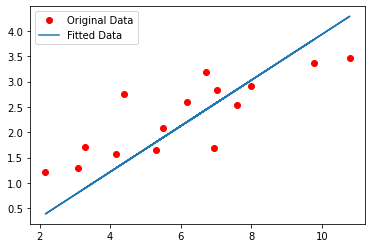

In [20]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()

plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predicted, label='Fitted Data')
plt.legend()
plt.show()

# Save the Model Value...ckpt
# 지정한 이름으로 weight값이 저장된 파일이 생성됨.
# 배포할 때 이것을 배포하여 데이터만 받아서 학습 진행
torch.save(model.state_dict(), 'model.ckpt') # 모델에서 학습한 weight 값 저장